In [69]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

#Sean's packages
import math as m
import statistics as stat
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence

from collections import Counter

############# MY CODE
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

# check if these imports are used
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#import sys
#!{sys.executable} -m pip install xgboost

In [54]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# check shapes
train.shape, test.shape

((5331, 253), (3554, 252))

In [66]:
train.iloc[:,20:36]

,Feat 20,Feat 21,Feat 22,Feat 23,Feat 24,Feat 25,Feat 26,Feat 27,Feat 28,Feat 29,Feat 30,Feat 31,Feat 32,Feat 33,Feat 34,Feat 35
0,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.25,0.0,0.0,0.000000
1,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000
2,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000
3,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.50,0.0,0.0,0.000000
4,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.090909,0.00,0.0,0.0,0.000000
5,0.0,0,0,0,0,0,0,0.0,0,0.25,0.0,0.000000,0.00,0.0,0.0,0.000000
6,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000
7,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000
8,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000
9,0.0,0,0,0,0,0,0,0.0,0,0.00,0.0,0.181818,0.00,0.0,0.0,0.000000


In [7]:
train.describe()
#columns with a standard deviation of 0 should be removed

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,...,5331.000000,5331.000000,5331.0,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000
mean,2666.000000,0.998506,0.142550,0.998887,0.996074,0.099018,0.040598,0.028137,0.013060,0.050136,...,0.005346,0.000563,0.0,0.522928,0.078381,0.434711,0.222165,0.154182,0.521247,0.919657
std,1539.071473,0.012047,0.064343,0.010696,0.015199,0.106834,0.077767,0.074117,0.053347,0.100559,...,0.054956,0.018747,0.0,0.176868,0.087822,0.258655,0.102157,0.107699,0.095065,0.027995
min,1.000000,0.281689,0.000000,0.278493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000110,0.000000,0.000000,0.000000,0.159137,0.845348
25%,1333.500000,0.998859,0.164706,0.998435,0.996382,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.470588,0.026702,0.267000,0.150607,0.082090,0.461988,0.903749
50%,2666.000000,0.999577,0.167059,0.999583,0.996741,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.562353,0.042039,0.474000,0.205960,0.135370,0.523780,0.912556
75%,3998.500000,0.999956,0.174118,0.999863,0.997143,0.133333,0.057143,0.000000,0.000000,0.045455,...,0.000000,0.000000,0.0,0.641098,0.091802,0.632000,0.271628,0.209626,0.579569,0.926694
max,5331.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.995914,1.000000,1.000000,1.000000


In [8]:
#43 columns have a standard deviation of 0
train_std_dev = train.describe().iloc[2:3,:].values
std_dev_0 = [train_std_dev==0.0]

np.sum(std_dev_0)

43

In [9]:
#Check if there are categorical variables in columns
data_types = train.dtypes.values.tolist()
bool_int64 = list(map(lambda x: x=='int64', data_types))
train_int64 = train.loc[:,bool_int64]
train_int64.head()

,Id,Feat 21,Feat 22,Feat 23,Feat 24,Feat 25,Feat 26,Feat 28,Feat 40,Feat 42,...,Feat 228,Feat 229,Feat 230,Feat 234,Feat 236,Feat 237,Feat 238,Feat 239,Feat 240,Feat 245
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_int64.describe()

,Id,Feat 21,Feat 22,Feat 23,Feat 24,Feat 25,Feat 26,Feat 28,Feat 40,Feat 42,...,Feat 228,Feat 229,Feat 230,Feat 234,Feat 236,Feat 237,Feat 238,Feat 239,Feat 240,Feat 245
count,5331.000000,5331.0,5331.0,5331.0,5331.0,5331.0,5331.0,5331.0,5331.0,5331.000000,...,5331.0,5331.0,5331.0,5331.000000,5331.0,5331.0,5331.0,5331.0,5331.0,5331.0
mean,2666.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000938,...,0.0,0.0,0.0,0.004314,0.0,0.0,0.0,0.0,0.0,0.0
std,1539.071473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030614,...,0.0,0.0,0.0,0.065548,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,1333.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2666.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,3998.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,5331.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [12]:
#checking range of data sets. no scaling is necessary
max(train.iloc[:,1:].max()), min(train.iloc[:,1:].max()), max(test.iloc[:,1:].max()), min(test.iloc[:,1:].max())

(1.0, 0.0, 1.0, 0.0)

In [13]:
#Check for nan values in Train DF
True in pd.isnull(train)

False

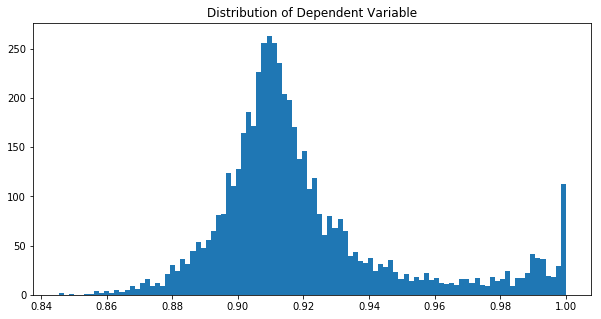

In [14]:
# Explore distribution of target
plt.figure(figsize=(10,5))
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [15]:
train.columns = train.columns.str.replace(' ', '')

# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [16]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

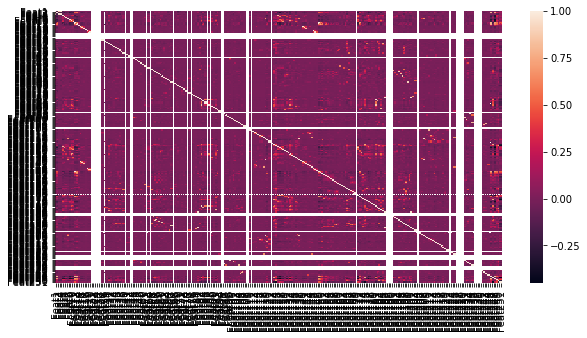

In [17]:
#correlation matrix heatmap
corr = X_train.corr()

# plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

******************************************************************************************************************
# Model 1: Simple Linear Regression
******************************************************************************************************************

In [55]:
#split training set into training and validation set
X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=181)

In [ ]:
#Calculating VIF to assess multicolinearity. Generally, higher than 5 implies high correlation
features = "+".join(X_train.columns).replace(" ", "")

# get y and X dataframes based on this regression:
y, X = dmatrices('Target~'+features, train, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

'''
There are many vifs with an inf or a nan score. Likely to be zero vectors that are fully explained by other columns
because the 0 vector is linearly dependent to other vectors. Thus, R^2 in denominator of VIF is 1 or close to 1, 
as it is fully explained by other variables. There are also many features with over 10 VIF values. 
'''

In [13]:
vif.round(1).head(16)

,VIF Factor,features
0,7.059811e+08,Intercept
1,1.980000e+01,Feat1
2,5.700000e+00,Feat2
3,1.420000e+01,Feat3
4,4.110000e+01,Feat4
5,4.855000e+02,Feat5
6,7.353000e+02,Feat6
7,7.200000e+00,Feat7
8,8.200000e+00,Feat8
9,4.797000e+02,Feat9


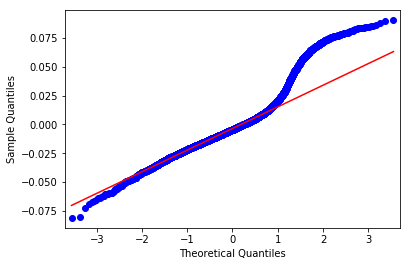

<Figure size 720x360 with 0 Axes>

In [15]:
#QQ PLOT comparison of residuals against a standard normal to test normality assumption of residuals. Generally,
#a completely diagonal line implies 
X_train.exog = sm.add_constant(X_train)
mod_fit = sm.OLS(y_train, X_train).fit()
res = mod_fit.resid
fig = sm.qqplot(res, line='q')
plt.figure(figsize=(10,5))
plt.show()

#data seems roughly normal based on quantile comparison. 
#perhaps slightly shorter tail on the right side of the ditribution.

In [73]:
# Fit unregularized linear regression and see RMSE on training set

myscores = np.array([])

reg = Lin_Reg()
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

np.sqrt(myscores)

array([115.54090218])

******************************************************************************************************************
# Models 2, 3, and 4: Ridge, Lasso and Elastic Net
******************************************************************************************************************

In [74]:
# Set of shrinkage parameters
lambdas = [.001, .005, 1, 5, 10, 50, 100, 500, 1000]

# Set of alphas for elastic net
alphs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]  

best_lambda = .005
best_alph = 0.2

myscores = np.array([])

# RIDGE
reg = Ridge(alpha= best_lambda)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#LASSO
reg = Lasso(alpha= best_lambda)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#ELASTIC NET
reg = ElasticNet(random_state=181, l1_ratio = best_alph, alpha= best_lambda) 
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

print(np.sqrt(myscores))

[0.02842409 0.02764108 0.02764105]


******************************************************************************************************************
# Model 5: Tree Models
******************************************************************************************************************

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

myscores = np.array([])

#Decision Tree
reg = DecisionTreeRegressor()
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))
    
# Random Forest
clf = RandomForestRegressor(n_estimators=100,random_state=181)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))
    
#AdaBoost Decision Tree
reg = AdaBoostRegressor(n_estimators=100)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#Gradient Boosting Model (Regression Tree)
reg = GradientBoostingRegressor(n_estimators=100)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

print(np.sqrt(myscores))

[0.03743352 0.03716845 0.02945973 0.02684754]


******************************************************************************************************************
# Train on Full Custom Training Set, Predict on Custom Test
******************************************************************************************************************

In [86]:
#Elastic Net vs. Gradient Boosting
myscores = np.array([])

reg = Lasso(alpha= best_lambda)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
myscores = np.append(myscores, mean_squared_error(y_test, y_pred))

reg = ElasticNet(random_state=181, l1_ratio = best_alph, alpha= best_lambda) 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
myscores = np.append(myscores, mean_squared_error(y_test, y_pred))

reg = GradientBoostingRegressor(n_estimators=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
myscores = np.append(myscores, mean_squared_error(y_test, y_pred))

print(np.sqrt(myscores))

[0.02940298 0.02940298 0.02620904]


******************************************************************************************************************
# Predict on Full Test Set
******************************************************************************************************************

In [92]:
test = test.iloc[:, 1:]

In [93]:
#Final Model: Gradient Boosting on Regression Trees
reg = GradientBoostingRegressor(n_estimators=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [94]:
y_pred

array([0.91050571, 0.93222848, 0.92021419, ..., 0.92399666, 0.9224878 ,
       0.92023951])